# **Importing the Required Libraries**

In [83]:
!pip install scikit-learn

In [333]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import lxml
import time
import pandas as pd
import numpy as np
import requests
import html
import seaborn as sns
from bs4 import BeautifulSoup
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [25]:
results=[]
headers = {
        'Accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
        'Accept-Encoding': 'gzip, deflate, br',
        'Accept-Language': 'tr-TR,tr;q=0.9,en-US;q=0.8,en;q=0.7',
        'Cache-Control': 'max-age=0',
        'Cookie':'zguid=24|%24028f0195-e231-4be2-829e-d8bcb4ac3239; zgsession=1|6c934aa2-6a0b-4752-a54c-50b4e9e983fa; x-amz-continuous-deployment-state=AYABeJbvQVGrX1047P18u%2FuoEqoAPgACAAFEAB1kM2Jsa2Q0azB3azlvai5jbG91ZGZyb250Lm5ldAABRwAVRzA3MjU1NjcyMVRZRFY4RDcyVlpWAAEAAkNEABpDb29raWUAAACAAAAADGXWg1Z6055f3nNqSgAw7XhrOZDwkiZIsaGxfZznrzw9zAPh5T5rzoN3IGNi5unaBgT2CqRPOjjz2oQ2qjhqAgAAAAAMAAQAAAAAAAAAAAAAAAAAAPtS6WIOJxz3BfK+nIL6M8f%2F%2F%2F%2F%2FAAAAAQAAAAAAAAAAAAAAAQAAAAw7H2cckLzIeEe4zRNDjGoq%2FR1dmMPy7jVJI+fW1dmMPy7jVJI+fQ==; _ga=GA1.2.1937329820.1698673664; _gid=GA1.2.1005952792.1698673664; zjs_anonymous_id=%22028f0195-e231-4be2-829e-d8bcb4ac3239%22; zjs_user_id=null; zg_anonymous_id=%22d896b34d-119c-41e1-bba2-bbff7bce3411%22; _gat=1; _pxff_cc=U2FtZVNpdGU9TGF4Ow==; pxcts=e64a4a97-772a-11ee-be83-b8fe2f6df917; _pxvid=e64a3d9c-772a-11ee-be83-0afc61f13033; _pxff_cfp=1; _pxff_bsco=1; _gcl_au=1.1.643256812.1698673664; DoubleClickSession=true; __pdst=8416aaec1419462c881ed7309254d8aa; _hp2_id.1215457233=%7B%22userId%22%3A%22829620817075435%22%2C%22pageviewId%22%3A%225964655598807275%22%2C%22sessionId%22%3A%228855927001535143%22%2C%22identity%22%3Anull%2C%22trackerVersion%22%3A%224.0%22%7D; _hp2_ses_props.1215457233=%7B%22r%22%3A%22https%3A%2F%2Fwww.google.com%2F%22%2C%22ts%22%3A1698673664974%2C%22d%22%3A%22www.zillow.com%22%2C%22h%22%3A%22%2F%22%7D; _fbp=fb.1.1698673665806.447398968; _clck=1ulf5z0|2|fga|0|1398; JSESSIONID=29792EA9AED80A48ECEA6DE8324AF793; AWSALB=XQblI6xutXkAunKUfPHFkyP4Fw4KDLbbghS/z7HTQlKZ1pFVjTeNQ/cs5LXSSYainGrBZ4CEeMTE7ZLeLs7UPER96HES0TtXX79xKOZi4V/wp+NMQa+CTe68r6hf; AWSALBCORS=XQblI6xutXkAunKUfPHFkyP4Fw4KDLbbghS/z7HTQlKZ1pFVjTeNQ/cs5LXSSYainGrBZ4CEeMTE7ZLeLs7UPER96HES0TtXX79xKOZi4V/wp+NMQa+CTe68r6hf; _px3=9095da9bd93ada16f913b7c92c12d126a9661b7e85a4b376d5da074588dafbf8:n+M/8uT4yLNChByRnyu70xWZ8Id43sSS07Ys1LPseXLfy0NB11/Tr4AfAKmedQvbyZSa0Q5DuFiRZtmXacd7oQ==:1000:O5SrXIfYtaz46F9YRWnFUggygftYfgyslNK9fk68c2o2xUUwlAZ/aT1IY5ZJmjs6/DgcxRgvD8Hq3mjH0bBaSJFP+wiYzw0sI/tJqyIlagonjMGDyKl+dWnGuNB6HdRClSWY29enH6wi4tiSZpGEsCkjQE+vF3G/KUA7UksKXlefd6abOFIjC2A2WAPUwR79+bwV7dfh4+DobrhUUzS3FrkAsK2V7sLEjw28kw2/kYU=; _uetsid=e7e8e700772a11ee83134318e5717d0b; _uetvid=e7e90b30772a11eea494e9e85a2c1e2a; _pin_unauth=dWlkPVpETTVZVE5sTURZdFltRTFOaTAwTURFeExXRTJabVl0WWpOak56ZGhaakJoWWprMg; _clsk=1x0njl1|1698673701871|5|0|b.clarity.ms/collect; search=6|1701265701251%7Crect%3D41.91760513417389%2C-87.33025437792969%2C41.75030999352702%2C-88.13362962207032%26rid%3D17426%26disp%3Dmap%26mdm%3Dauto%26p%3D1%26z%3D1%26listPriceActive%3D1%26fs%3D1%26fr%3D0%26mmm%3D0%26rs%3D0%26ah%3D0%26singlestory%3D0%26housing-connector%3D0%26abo%3D0%26garage%3D0%26pool%3D0%26ac%3D0%26waterfront%3D0%26finished%3D0%26unfinished%3D0%26cityview%3D0%26mountainview%3D0%26parkview%3D0%26waterview%3D0%26hoadata%3D1%26zillow-owned%3D0%263dhome%3D0%26featuredMultiFamilyBuilding%3D0%26commuteMode%3Ddriving%26commuteTimeOfDay%3Dnow%09%0917426%09%7B%22isList%22%3Atrue%2C%22isMap%22%3Atrue%7D%09%09%09%09%09',
        'Referer': 'https://www.zillow.com/',
        'Sec-Ch-Ua':'"Chromium";v="118", "Google Chrome";v="118", "Not=A?Brand";v="99"',
        'Sec-Ch-Ua-Mobile':'?0',
        'Sec-Ch-Ua-Platform':"Windows",
        'Sec-Fetch-Dest': 'document',
        'Sec-Fetch-Mode': 'navigate',
        'Sec-Fetch-Site':'same-origin',
        'Sec-Fetch-User':'?1',
        'Upgrade-Insecure-Requests':'1',
        'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36'
    }
#Generating Urls for scraping
first_url = "https://www.zillow.com/chicago-il-60615/"


# **The Link Generator Method**

In [26]:
def generate_links(link, part_to_replace,page_attributes):
  #print(link)
  links={}
  replacement_values=[]
  for key, value in page_attributes.items():
    for page_num in range(2, value+1):
      replacement_values.append(str(key)+"/"+str(page_num)+"_p")
  #print(replacement_values)

  for replacement_value in replacement_values:
      # Replace the text_to_replace with the current replacement_value
      modified_link = link.replace(part_to_replace, replacement_value)
      if modified_link[-5]!="/":
        links[modified_link]= replacement_value[:-5]
      else:
        links[modified_link]= replacement_value[:-4]

  return links


# **Generating The Scraping Links According To The Input Dictionary**

In [27]:
page_attributes={"queens-new-york-ny":15,
                 "brooklyn-new-york-ny":15,
                 "manhattan-new-york-ny":15,
                 "bronx-new-york-ny":15,
                 "staten-island-new-york-ny":15}
part_to_replace = "chicago-il-60615"
links=generate_links(first_url,part_to_replace,page_attributes)

# Convert the dictionary to a list of tuples
data = [(key, value) for key, value in links.items()]

# Create a DataFrame from the list of tuples
df = pd.DataFrame(data, columns=["URL", "Location"])

# Print the DataFrame
print(df)

                                                  URL  \
0      https://www.zillow.com/queens-new-york-ny/2_p/   
1      https://www.zillow.com/queens-new-york-ny/3_p/   
2      https://www.zillow.com/queens-new-york-ny/4_p/   
3      https://www.zillow.com/queens-new-york-ny/5_p/   
4      https://www.zillow.com/queens-new-york-ny/6_p/   
..                                                ...   
65  https://www.zillow.com/staten-island-new-york-...   
66  https://www.zillow.com/staten-island-new-york-...   
67  https://www.zillow.com/staten-island-new-york-...   
68  https://www.zillow.com/staten-island-new-york-...   
69  https://www.zillow.com/staten-island-new-york-...   

                     Location  
0          queens-new-york-ny  
1          queens-new-york-ny  
2          queens-new-york-ny  
3          queens-new-york-ny  
4          queens-new-york-ny  
..                        ...  
65  staten-island-new-york-ny  
66  staten-island-new-york-ny  
67  staten-island-new-york-

# **Scraping Data From The Generated Links**

In [28]:
prices=[]
beds=[]
baths=[]
sqft=[]
url=[]
location=[]
for link in links:
  response=requests.get(link,headers=headers)
  soup=BeautifulSoup(response.text,'lxml')
  articles=soup.find_all('article')
  sqrft=soup.find_all

  for article in articles:
      #prices.append(article.span.text)
      li_elements=article.ul.find_all('li')
      #card_link= article.find('a',{'data-test':'property-card-link'})["href"]
      #print(card_link)

      if len(li_elements)== 3:
            url.append(link)
            location_get=df[df['URL']==link]['Location']
            location.append(location_get.values[0])
            #print(article.span.text)
            prices.append(article.span.text)

            for li in li_elements:
              # Print the text within each li element
                li_cleaned = li.text.replace(" ", "")
                #print(li_cleaned[-2:])

                if li_cleaned[-2:]=='bd':
                    beds.append(li_cleaned[:-2])

                elif li_cleaned[-3:]=='bds':
                    beds.append(li_cleaned[:-3])

                elif li_cleaned=='Studio':
                    beds.append('0')

                elif li_cleaned[-2:]=='ba':
                  baths.append(li_cleaned[:-2])

                elif li_cleaned[-4:]=='sqft':
                  sqft.append(li_cleaned[:-4])

#This failed part intended to scrape the transportation data.
      #card_response=requests.get(card_link,headers=headers)
      #card_soup= BeautifulSoup(card_response.text,'lxml')

      #score_text=card_soup.find_all('a')
      #print(score_text.find())
      #print(transit_score.prettify())


scrape_data={"Price":prices,
             "Sqft":sqft,
             "Location":location,
             "Bed":beds,
             "Bath":baths}

df_scraped=pd.DataFrame(scrape_data)


In [29]:
df_scraped

,Price,Sqft,Location,Bed,Bath
0,"$1,088,000",--,queens-new-york-ny,3,3
1,"$1,697,850",--,queens-new-york-ny,6,4
2,"$5,500,000","5,935",queens-new-york-ny,6,6
3,"$610,000",--,queens-new-york-ny,3,2
4,"$159,000",--,queens-new-york-ny,1,1
...,...,...,...,...,...
623,"$785,000","1,850",staten-island-new-york-ny,4,2
624,"$1,425,000","2,600",staten-island-new-york-ny,6,5
625,"$798,000","1,350",staten-island-new-york-ny,4,4
626,"$1,080,000","3,200",staten-island-new-york-ny,4,4


In [30]:
file_path_raw = "raw_houseprice_data.csv"
df_scraped.to_csv(file_path_raw, index=False)

In [31]:
print(df_scraped.dtypes)
print(type(df_scraped["Bed"][1]))

Price       object
Sqft        object
Location    object
Bed         object
Bath        object
dtype: object
<class 'str'>


As it can be seen above, the types of the columns should be casted to integer.

In [290]:
df_pricedata_raw=pd.read_csv("raw_houseprice_data.csv")

In [291]:
df_pricedata_raw = pd.DataFrame(df_pricedata_raw)

In [292]:
df_pricedata_raw

,Price,Sqft,Location,Bed,Bath
0,"$1,088,000",--,queens-new-york-ny,3,3
1,"$1,697,850",--,queens-new-york-ny,6,4
2,"$5,500,000","5,935",queens-new-york-ny,6,6
3,"$610,000",--,queens-new-york-ny,3,2
4,"$159,000",--,queens-new-york-ny,1,1
...,...,...,...,...,...
623,"$785,000","1,850",staten-island-new-york-ny,4,2
624,"$1,425,000","2,600",staten-island-new-york-ny,6,5
625,"$798,000","1,350",staten-island-new-york-ny,4,4
626,"$1,080,000","3,200",staten-island-new-york-ny,4,4


# **Data Preprocessing**

# **Formatting the Data Part 1: Casting The String Types to Float**

In [293]:
def price_convert_to_int(price_str):

      # Remove "$" and "," characters
      cleaned_str = price_str.replace('$', '').replace(',', '')

      # Check if the string ends with 'K'
      if cleaned_str.endswith('K'):
          # Remove 'K' and convert to float (e.g., '212K' to 212.0)
          return float(cleaned_str[:-1]) * 1000
      else:
          # Convert to integer
          return int(cleaned_str)

df_scraped_intconv=df_pricedata_raw
df_scraped_intconv['Price'] = df_pricedata_raw['Price'].apply(price_convert_to_int)

In [294]:
df_scraped_intconv

,Price,Sqft,Location,Bed,Bath
0,1088000.0,--,queens-new-york-ny,3,3
1,1697850.0,--,queens-new-york-ny,6,4
2,5500000.0,"5,935",queens-new-york-ny,6,6
3,610000.0,--,queens-new-york-ny,3,2
4,159000.0,--,queens-new-york-ny,1,1
...,...,...,...,...,...
623,785000.0,"1,850",staten-island-new-york-ny,4,2
624,1425000.0,"2,600",staten-island-new-york-ny,6,5
625,798000.0,"1,350",staten-island-new-york-ny,4,4
626,1080000.0,"3,200",staten-island-new-york-ny,4,4


In [295]:
df_scraped_intconv.replace('--', np.nan, inplace=True)
df_scraped_intconv

,Price,Sqft,Location,Bed,Bath
0,1088000.0,NaN,queens-new-york-ny,3,3
1,1697850.0,NaN,queens-new-york-ny,6,4
2,5500000.0,"5,935",queens-new-york-ny,6,6
3,610000.0,NaN,queens-new-york-ny,3,2
4,159000.0,NaN,queens-new-york-ny,1,1
...,...,...,...,...,...
623,785000.0,"1,850",staten-island-new-york-ny,4,2
624,1425000.0,"2,600",staten-island-new-york-ny,6,5
625,798000.0,"1,350",staten-island-new-york-ny,4,4
626,1080000.0,"3,200",staten-island-new-york-ny,4,4


In [296]:
df_scraped_intconv['Bed']=df_scraped_intconv['Bed'].astype(float)
df_scraped_intconv['Bath']=df_scraped_intconv['Bath'].astype(float)
df_scraped_intconv['Sqft']=df_scraped_intconv['Sqft'].str.replace(',', '').astype(float)
df_scraped_intconv

,Price,Sqft,Location,Bed,Bath
0,1088000.0,NaN,queens-new-york-ny,3.0,3.0
1,1697850.0,NaN,queens-new-york-ny,6.0,4.0
2,5500000.0,5935.0,queens-new-york-ny,6.0,6.0
3,610000.0,NaN,queens-new-york-ny,3.0,2.0
4,159000.0,NaN,queens-new-york-ny,1.0,1.0
...,...,...,...,...,...
623,785000.0,1850.0,staten-island-new-york-ny,4.0,2.0
624,1425000.0,2600.0,staten-island-new-york-ny,6.0,5.0
625,798000.0,1350.0,staten-island-new-york-ny,4.0,4.0
626,1080000.0,3200.0,staten-island-new-york-ny,4.0,4.0


In [297]:
column_data_types = df_scraped_intconv.dtypes
column_data_types

Price       float64
Sqft        float64
Location     object
Bed         float64
Bath        float64
dtype: object

# **Formatting the Data Part 2:Imputing The Missing Data**

Here it can be clearly seen from the data that there are many missing values in sqft coulumn. Thus, to understand whether there is a pattern in missing value occurence or not, the missingno library can be used to track.

<Axes: >

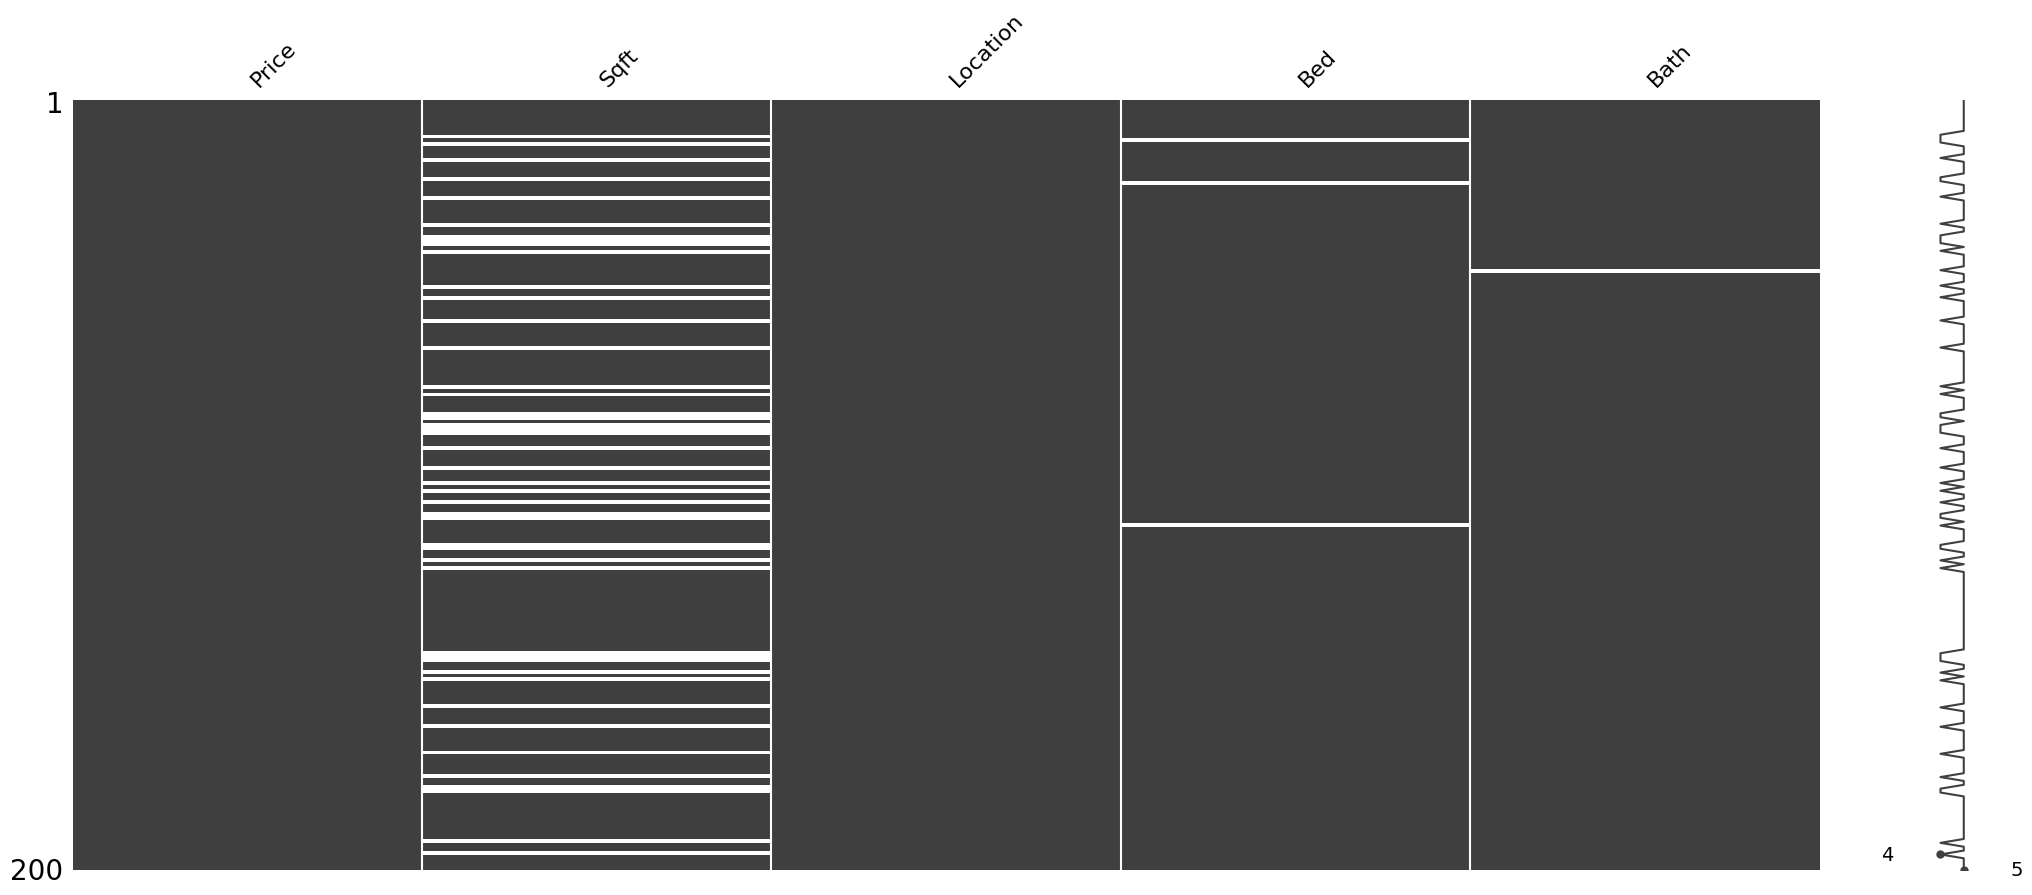

In [298]:
import missingno as msno

%matplotlib inline
msno.matrix(df_scraped_intconv.sample(200))

Here, it can be seen from the lost datas in sqft column, there is no visible pattern. It means that the missing values occured beacuse of the users' preference, not beacuse of the data scraping method. Also, the 23% of the data is lost which is to be either replaced or erased with its row.
Thus, following this idea missing data can be imputed by mean or median values in order to not lose pricing data.(?)

In [299]:
#Imputing Sqft Column
df_scraped_imputed=df_scraped_intconv
df_scraped_imputed['Sqft'] = df_scraped_imputed['Sqft'].replace('NaN', pd.NA)
imputer = SimpleImputer(strategy='median')

df_scraped_imputed['Sqft'] = imputer.fit_transform(df_scraped_imputed[['Sqft']])

In [300]:
#Imputing Bed Column
df_scraped_imputed['Bed'] = df_scraped_imputed['Bed'].replace('NaN', pd.NA)
imputer = SimpleImputer(strategy='median')

df_scraped_imputed['Bed'] = imputer.fit_transform(df_scraped_imputed[['Bed']])

In [301]:
#Imputing Bath Column
df_scraped_imputed['Bath'] = df_scraped_imputed['Bath'].replace('NaN', pd.NA)
imputer = SimpleImputer(strategy='median')

df_scraped_imputed['Bath'] = imputer.fit_transform(df_scraped_imputed[['Bath']])

In [302]:
df_scraped_imputed

,Price,Sqft,Location,Bed,Bath
0,1088000.0,1700.0,queens-new-york-ny,3.0,3.0
1,1697850.0,1700.0,queens-new-york-ny,6.0,4.0
2,5500000.0,5935.0,queens-new-york-ny,6.0,6.0
3,610000.0,1700.0,queens-new-york-ny,3.0,2.0
4,159000.0,1700.0,queens-new-york-ny,1.0,1.0
...,...,...,...,...,...
623,785000.0,1850.0,staten-island-new-york-ny,4.0,2.0
624,1425000.0,2600.0,staten-island-new-york-ny,6.0,5.0
625,798000.0,1350.0,staten-island-new-york-ny,4.0,4.0
626,1080000.0,3200.0,staten-island-new-york-ny,4.0,4.0


<Axes: >

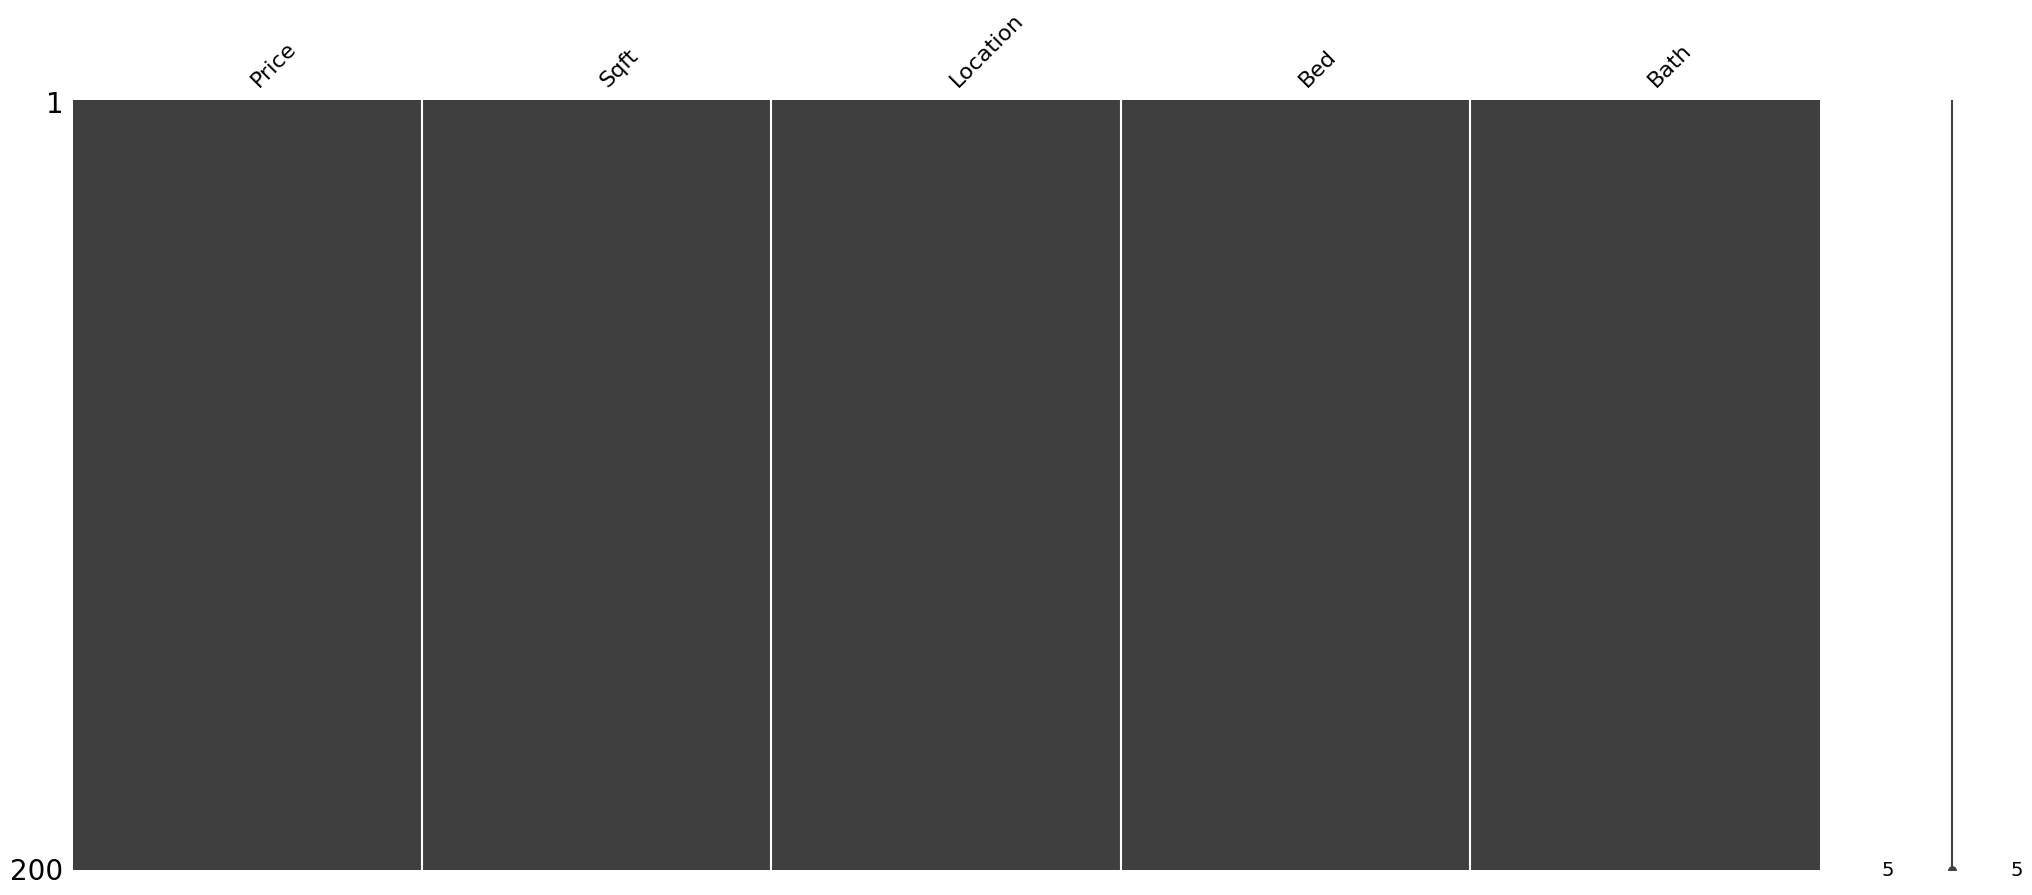

In [303]:
%matplotlib inline
msno.matrix(df_scraped_imputed.sample(200))

There is no missing values anymore. They all replaced by median values of the columns.

# **Data Exploration**

<Axes: xlabel='Price', ylabel='Location'>

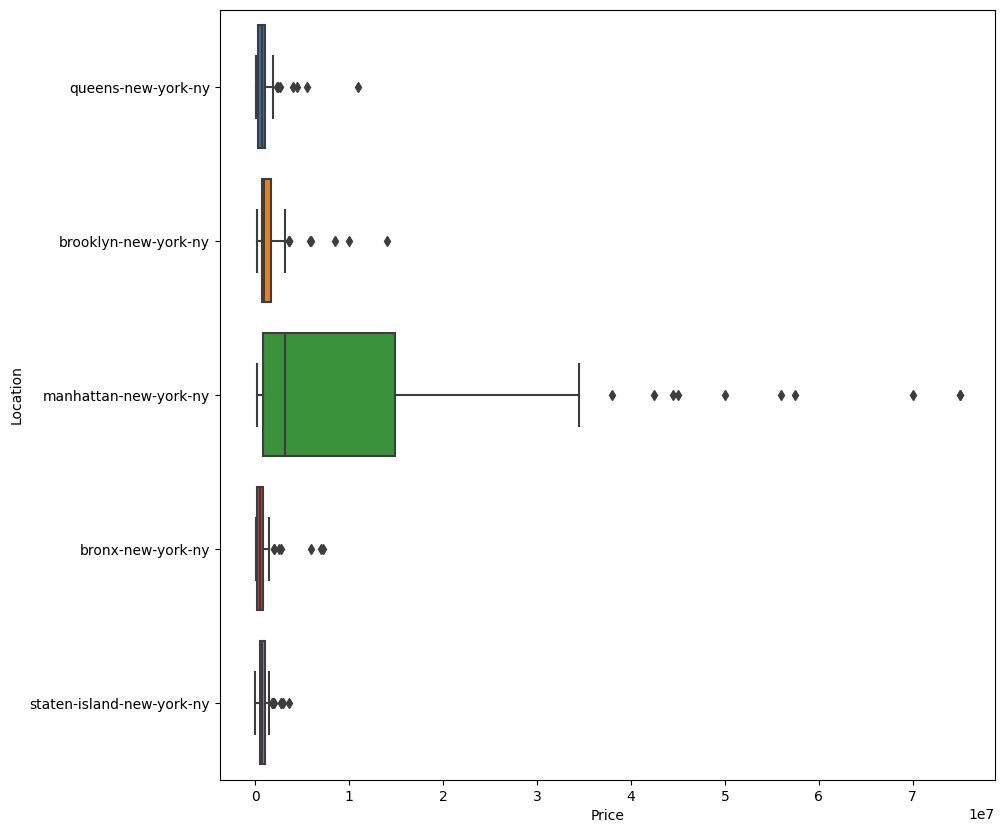

In [304]:
plt.figure(figsize=(10,10))
sns.boxplot(x=df_scraped_imputed["Price"],y=df_scraped_imputed["Location"])

There are many outliers that should be eleminated.

<Axes: xlabel='Price', ylabel='Location'>

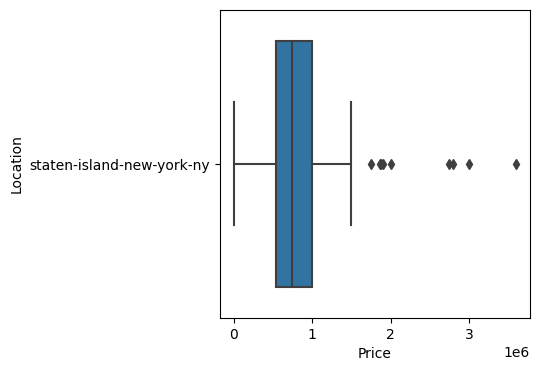

In [305]:
plt.figure(figsize=(4, 4))
staten_island_data = df_scraped_imputed[df_scraped_imputed["Location"] == "staten-island-new-york-ny"]
sns.boxplot(x=staten_island_data["Price"], y=staten_island_data["Location"])

<Axes: xlabel='Price', ylabel='Location'>

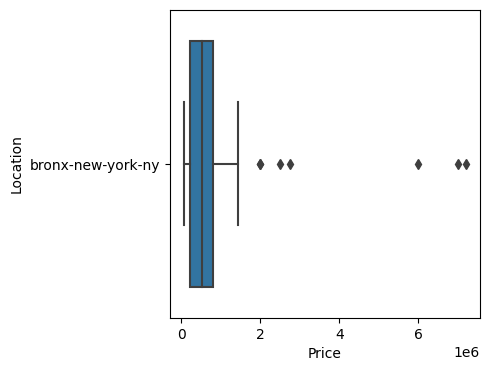

In [306]:
plt.figure(figsize=(4, 4))
bronx_data = df_scraped_imputed[df_scraped_imputed["Location"] == "bronx-new-york-ny"]
sns.boxplot(x=bronx_data["Price"], y=bronx_data["Location"])

<Axes: xlabel='Price', ylabel='Location'>

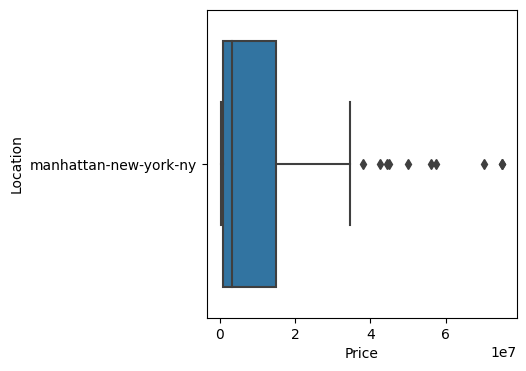

In [307]:
plt.figure(figsize=(4, 4))
manhattan_data = df_scraped_imputed[df_scraped_imputed["Location"] == "manhattan-new-york-ny"]
sns.boxplot(x=manhattan_data["Price"], y=manhattan_data["Location"])

<Axes: xlabel='Price', ylabel='Location'>

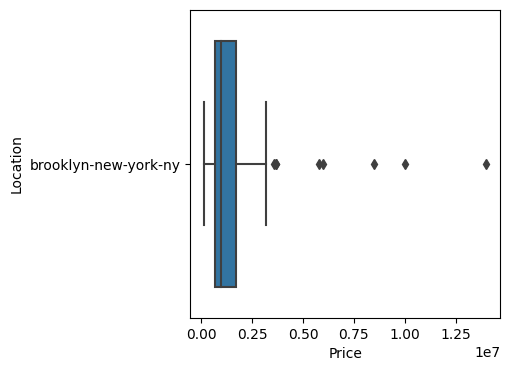

In [308]:
plt.figure(figsize=(4, 4))
brooklyn_data = df_scraped_imputed[df_scraped_imputed["Location"] == "brooklyn-new-york-ny"]
sns.boxplot(x=brooklyn_data["Price"], y=brooklyn_data["Location"])

<Axes: xlabel='Price', ylabel='Location'>

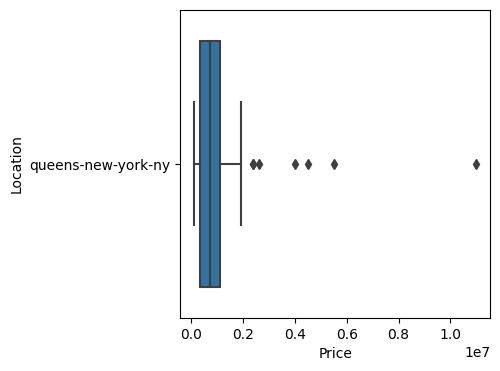

In [309]:
plt.figure(figsize=(4, 4))
queens_data = df_scraped_imputed[df_scraped_imputed["Location"] == "queens-new-york-ny"]
sns.boxplot(x=queens_data["Price"], y=queens_data["Location"])

# **Removing Outliers**

In [310]:
staten_island_outliers=staten_island_data[staten_island_data['Price'] > 1600000]
bronx_data_outliers=bronx_data[bronx_data['Price'] > 1500000]
manhattan_outliers=manhattan_data[manhattan_data['Price'] > 20000000]
brooklyn_outliers=brooklyn_data[brooklyn_data['Price'] > 3000000]
queens_outliers=queens_data[queens_data['Price'] > 2000000]
drop_indexes=[staten_island_outliers.index,bronx_data_outliers.index,manhattan_outliers.index,brooklyn_outliers.index,queens_outliers.index]
drop_indexes

[Int64Index([511, 543, 552, 573, 587, 588, 599, 609, 615], dtype='int64'),
 Int64Index([397, 413, 428, 454, 469, 475, 498], dtype='int64'),
 Int64Index([251, 255, 256, 260, 261, 262, 265, 266, 267, 268, 272, 282, 291,
             301, 302, 303, 304, 311, 319, 339, 340, 361, 363, 370, 372, 373],
            dtype='int64'),
 Int64Index([125, 129, 132, 138, 167, 173, 175, 177, 215, 228], dtype='int64'),
 Int64Index([2, 56, 62, 75, 76, 107, 111], dtype='int64')]

These are the outliers' indexes.

In [311]:
for drop_index in drop_indexes:
  df_scraped_imputed= df_scraped_imputed.drop(drop_index)
df_scraped_imputed

,Price,Sqft,Location,Bed,Bath
0,1088000.0,1700.0,queens-new-york-ny,3.0,3.0
1,1697850.0,1700.0,queens-new-york-ny,6.0,4.0
3,610000.0,1700.0,queens-new-york-ny,3.0,2.0
4,159000.0,1700.0,queens-new-york-ny,1.0,1.0
5,699000.0,1700.0,queens-new-york-ny,4.0,4.0
...,...,...,...,...,...
623,785000.0,1850.0,staten-island-new-york-ny,4.0,2.0
624,1425000.0,2600.0,staten-island-new-york-ny,6.0,5.0
625,798000.0,1350.0,staten-island-new-york-ny,4.0,4.0
626,1080000.0,3200.0,staten-island-new-york-ny,4.0,4.0


<Axes: xlabel='Price', ylabel='Location'>

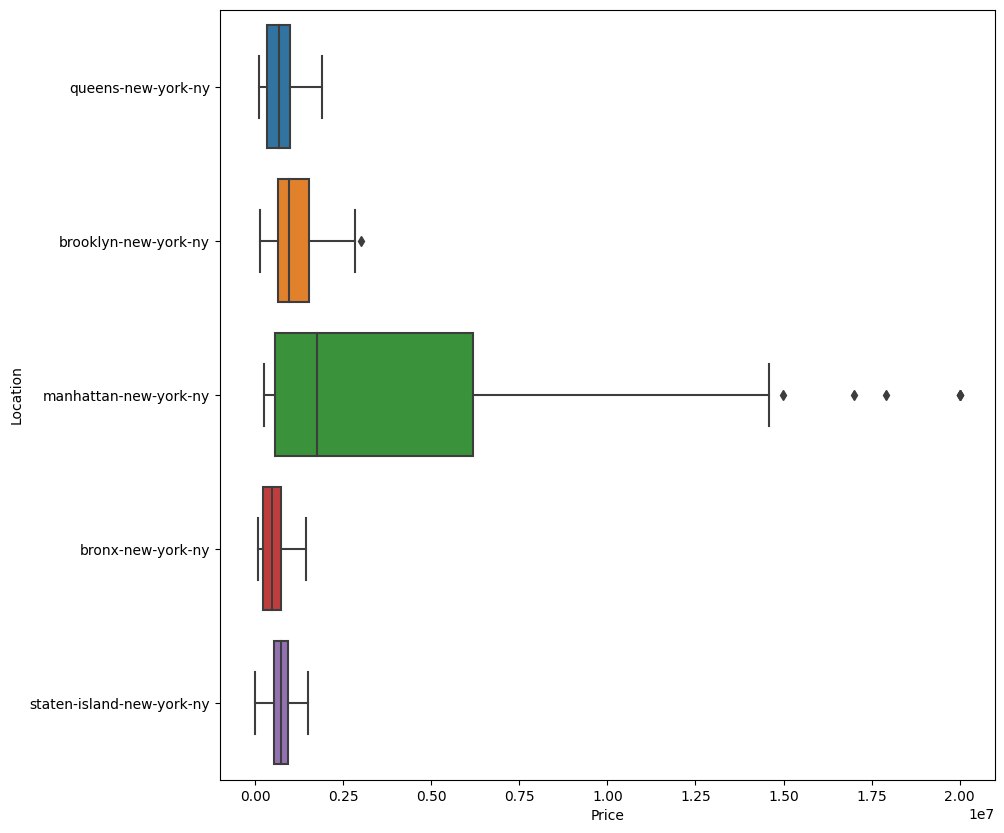

In [312]:
plt.figure(figsize=(10,10))
sns.boxplot(x=df_scraped_imputed["Price"],y=df_scraped_imputed["Location"])

Many of the outliers were removed from the dataset.

# **Formatting the Data Part 3: One-Hot Encoding**

In [313]:
df_scraped_imputed['Location'].unique()

array(['queens-new-york-ny', 'brooklyn-new-york-ny',
       'manhattan-new-york-ny', 'bronx-new-york-ny',
       'staten-island-new-york-ny'], dtype=object)

In the Location column, there are several locations that can be encoded using One-Hot Encoding to easily interpret for the model. There are two popular methods for One-Hot-Encoding which are ColumnTransformer() (from scikit learn), and get_dummies() (from pandas).

In [314]:
df_scraped_encoded=pd.get_dummies(df_scraped_imputed, columns=['Location'])

In [315]:
df_scraped_encoded

,Price,Sqft,Bed,Bath,Location_bronx-new-york-ny,Location_brooklyn-new-york-ny,Location_manhattan-new-york-ny,Location_queens-new-york-ny,Location_staten-island-new-york-ny
0,1088000.0,1700.0,3.0,3.0,0,0,0,1,0
1,1697850.0,1700.0,6.0,4.0,0,0,0,1,0
3,610000.0,1700.0,3.0,2.0,0,0,0,1,0
4,159000.0,1700.0,1.0,1.0,0,0,0,1,0
5,699000.0,1700.0,4.0,4.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
623,785000.0,1850.0,4.0,2.0,0,0,0,0,1
624,1425000.0,2600.0,6.0,5.0,0,0,0,0,1
625,798000.0,1350.0,4.0,4.0,0,0,0,0,1
626,1080000.0,3200.0,4.0,4.0,0,0,0,0,1


# **Formatting the Data Part 4:Data Normalization**

In [317]:
scaler = MinMaxScaler()
df_scraped_encoded['Sqft'] = scaler.fit_transform(df_scraped_encoded[['Sqft']])
df_scraped_encoded['Price'] = scaler.fit_transform(df_scraped_encoded[['Price']])

In [319]:
df_scraped_encoded

,Price,Sqft,Bed,Bath,Location_bronx-new-york-ny,Location_brooklyn-new-york-ny,Location_manhattan-new-york-ny,Location_queens-new-york-ny,Location_staten-island-new-york-ny
0,0.054400,0.072177,3.0,3.0,0,0,0,1,0
1,0.084892,0.072177,6.0,4.0,0,0,0,1,0
3,0.030500,0.072177,3.0,2.0,0,0,0,1,0
4,0.007950,0.072177,1.0,1.0,0,0,0,1,0
5,0.034950,0.072177,4.0,4.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
623,0.039250,0.080715,4.0,2.0,0,0,0,0,1
624,0.071250,0.123406,6.0,5.0,0,0,0,0,1
625,0.039900,0.052254,4.0,4.0,0,0,0,0,1
626,0.054000,0.157559,4.0,4.0,0,0,0,0,1


The preprocessing part is over, data was prepared for model training.

# **1st Model: Polynomial Regression**

In [377]:
for x in range(6):
  degree=x
  X=df_scraped_encoded[['Sqft','Bed','Bath','Location_bronx-new-york-ny','Location_brooklyn-new-york-ny','Location_manhattan-new-york-ny','Location_queens-new-york-ny','Location_staten-island-new-york-ny']]
  y=df_scraped_encoded['Price']

  poly = PolynomialFeatures(degree=degree)
  X_poly = poly.fit_transform(X)

  X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

  poly_reg = LinearRegression()
  poly_reg.fit(X_train, y_train)

  y_pred = poly_reg.predict(X_test)

  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  print(f"For degree:{x}, RMSE: {rmse}")


For degree:0, RMSE: 0.1385574001120683
For degree:1, RMSE: 0.10971855485106763
For degree:2, RMSE: 0.09909709066443224
For degree:3, RMSE: 0.20633707970151166
For degree:4, RMSE: 2.05870944206713
For degree:5, RMSE: 114.2244033198499


Since, the model's accuracy increases for the smaller values of  RMSE, the best degree for the data is second degree.